In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# setting to display all columns
pd.set_option("Display.max_columns", None)

In [3]:
# To read csv file
df = pd.read_csv('final_list_houses_dataset.csv',
                 index_col='Unnamed: 0',
                 skipinitialspace=True)
print(df.shape)
df.head().T

(10092, 17)


,0,3,4,5,6
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
fully equipped kitchen,installed,installed,NaN,NaN,installed
furnished,no,no,NaN,no,no
open fire,NaN,NaN,NaN,NaN,NaN
locality [zip code],3294,2070,8800,8000,8800
surface of the land [m²],429.0,1210.0,744.0,760.0,419.0


# Step 1: data cleaning

In [4]:
# To check columns
df.columns

Index(['Area [m²]', 'Price [€]', 'state of the building', 'number of facades',
       'number of bedrooms', 'fully equipped kitchen', 'furnished',
       'open fire', 'locality [zip code]', 'surface of the land [m²]',
       'terrace', 'terrace surface [m²]', 'swimming pool', 'type of property',
       'subtype of property', 'garden', 'garden surface [m²]'],
      dtype='object')

In [5]:
# columns to drop: kitchen, furnished, open fire, terrace, garden 
df1 = df.drop(['fully equipped kitchen', 'furnished',
               'open fire', 'terrace', 'terrace surface [m²]',
               'type of property', 'garden', 'garden surface [m²]'],
       axis=1)
df1.head().T

,0,3,4,5,6
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
locality [zip code],3294,2070,8800,8000,8800
surface of the land [m²],429.0,1210.0,744.0,760.0,419.0
swimming pool,NaN,NaN,NaN,NaN,NaN
subtype of property,house,villa,villa,house,villa


In [6]:
 # rename columns
df1.rename(columns={'Area [m²]': 'area', 
                   'Price [€]': 'price', 
                   'state of the building': 'status',
                   'number of facades': 'facades', 
                   'number of bedrooms': 'bedrooms',
                    'locality [zip code]': 'postcode',
                   'surface of the land [m²]': 'land',
                   'swimming pool': 'pool',
                   'subtype of property': 'subtype'} , 
          inplace=True)
df1.head()

,area,price,status,facades,bedrooms,postcode,land,pool,subtype
0,123.0,200000,good,3.0,2.0,3294,429.0,NaN,house
3,255.0,698000,just renovated,4.0,4.0,2070,1210.0,NaN,villa
4,234.0,499000,as new,NaN,5.0,8800,744.0,NaN,villa
5,219.0,717000,as new,NaN,4.0,8000,760.0,NaN,house
6,156.0,429000,good,4.0,4.0,8800,419.0,NaN,villa


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10092 entries, 0 to 11382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      8356 non-null   float64
 1   price     10092 non-null  object 
 2   status    6976 non-null   object 
 3   facades   7754 non-null   float64
 4   bedrooms  9940 non-null   float64
 5   postcode  10092 non-null  int64  
 6   land      10092 non-null  float64
 7   pool      400 non-null    object 
 8   subtype   10092 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 788.4+ KB


In [8]:
df1 = df1[df1.price!= 'no']

In [9]:
df1["price"] = pd.to_numeric(df1["price"])
df1.dtypes

area        float64
price         int64
status       object
facades     float64
bedrooms    float64
postcode      int64
land        float64
pool         object
subtype      object
dtype: object

In [10]:
df1.isnull().sum()*100/len(df1)

area        17.150527
price        0.000000
status      30.811294
facades     23.155697
bedrooms     1.501293
postcode     0.000000
land         0.000000
pool        96.023066
subtype      0.000000
dtype: float64

In [11]:
df1.duplicated().sum()

337

In [12]:
mask = df1.duplicated()
df1[mask]

,area,price,status,facades,bedrooms,postcode,land,pool,subtype
260,NaN,238250,NaN,NaN,3.0,3680,238.0,NaN,house
545,135.0,275000,NaN,3.0,3.0,9600,537.0,NaN,house
636,NaN,405000,as new,2.0,4.0,2800,192.0,NaN,house
768,129.0,238000,NaN,NaN,4.0,8800,137.0,NaN,house
820,150.0,315000,as new,3.0,3.0,9600,459.0,NaN,house
...,...,...,...,...,...,...,...,...,...
11178,NaN,229000,NaN,NaN,NaN,8420,540.0,NaN,building
11193,146.0,249000,as new,2.0,4.0,9900,178.0,NaN,house
11201,642.0,1495000,good,NaN,3.0,8470,5924.0,NaN,villa
11257,115.0,240500,NaN,2.0,3.0,7812,312.0,NaN,house


In [13]:
df1.shape

(10058, 9)

In [14]:
df1 = df1.drop_duplicates()
df1.shape

(9721, 9)

In [15]:
df1.duplicated().any()

False

In [16]:
df1.isnull().sum()

area        1655
price          0
status      2881
facades     2179
bedrooms     139
postcode       0
land           0
pool        9327
subtype        0
dtype: int64

In [22]:
df1 = df1.dropna(subset=['area','bedrooms'],  how='any')

In [23]:
df1.isnull().sum()

area           0
price          0
status         0
facades     1560
bedrooms       0
postcode       0
land           0
pool           0
subtype        0
dtype: int64

In [24]:
df1['status'].fillna('not specified', inplace=True)

In [25]:
df1['pool'] = df1['pool'].fillna(0)
df1['pool'] = df1['pool'].replace(True, 1)

In [26]:
df2 = df1.drop('facades', axis=1)

In [27]:
df2.isnull().sum()

area        0
price       0
status      0
bedrooms    0
postcode    0
land        0
pool        0
subtype     0
dtype: int64

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 11381
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      8004 non-null   float64
 1   price     8004 non-null   int64  
 2   status    8004 non-null   object 
 3   bedrooms  8004 non-null   float64
 4   postcode  8004 non-null   int64  
 5   land      8004 non-null   float64
 6   pool      8004 non-null   int64  
 7   subtype   8004 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 562.8+ KB


<AxesSubplot:>

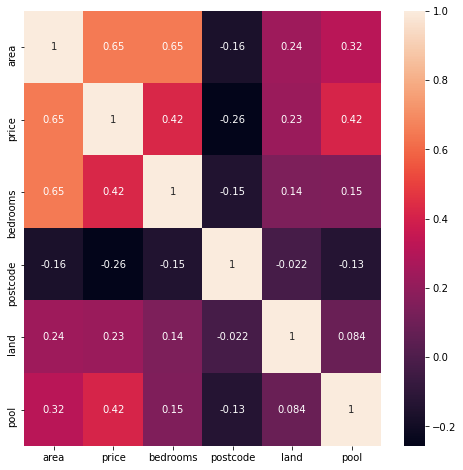

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True)

In [30]:
# Add new column zone (region)
conditions = [ (1000 <= df2['postcode']) & (df2['postcode'] < 1300),
              ((1300 <= df2['postcode']) & (df2['postcode'] < 1500))| 
              ((4000 <= df2['postcode']) & (df2['postcode'] < 8000)),
              ((1500 <= df2['postcode']) & (df2['postcode'] < 4000))| 
              ((8000 <= df2['postcode']) & (df2['postcode'] < 10000))]

values = ['brussels', 'wallonia','flanders']
df2['region'] = np.select(conditions, values)
print(df2['region'].value_counts())

flanders    4368
wallonia    3074
brussels     562
Name: region, dtype: int64


In [31]:
df2_region = pd.get_dummies(data=df2['region'], columns=values)

In [32]:
df3 = pd.concat([df2,df2_region], axis=1)
df3.head()

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders,0,1,0
3,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders,0,1,0
4,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders,0,1,0
5,219.0,717000,as new,4.0,8000,760.0,0,house,flanders,0,1,0
6,156.0,429000,good,4.0,8800,419.0,0,villa,flanders,0,1,0


In [33]:
df3.isnull().sum()

area        0
price       0
status      0
bedrooms    0
postcode    0
land        0
pool        0
subtype     0
region      0
brussels    0
flanders    0
wallonia    0
dtype: int64

<AxesSubplot:>

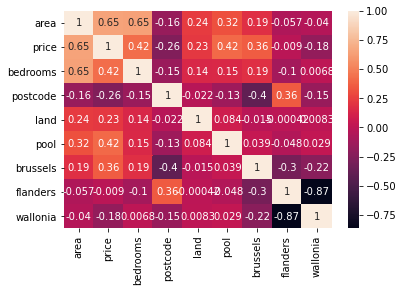

In [34]:
sns.heatmap(df3.corr(), annot=True)

In [35]:
df3_status = pd.get_dummies(data=df2['status'])
df3_status.rename(columns= {'as new': 'as_new',
                            'just renovated': 'just_renovated',
                            'not specified': 'not_specified',
                            'to be done up': 'to_be_done_up',
                            'to renovate': 'to_renovate',
                            'to restore': 'to_restore'},
                  inplace=True)
df3_status.head(20)

,as_new,good,just_renovated,not_specified,to_be_done_up,to_renovate,to_restore
0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0
10,1,0,0,0,0,0,0
13,0,0,0,0,0,1,0


In [36]:
df4 = pd.concat([df3, df3_status], axis=1)
df4.head()

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia,as_new,good,just_renovated,not_specified,to_be_done_up,to_renovate,to_restore
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders,0,1,0,0,1,0,0,0,0,0
3,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders,0,1,0,0,0,1,0,0,0,0
4,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders,0,1,0,1,0,0,0,0,0,0
5,219.0,717000,as new,4.0,8000,760.0,0,house,flanders,0,1,0,1,0,0,0,0,0,0
6,156.0,429000,good,4.0,8800,419.0,0,villa,flanders,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:>

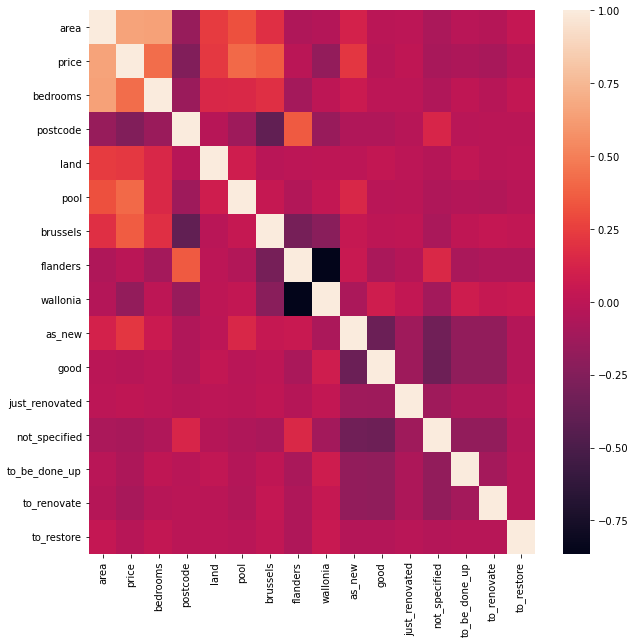

In [37]:
plt.figure(figsize=(10,10))

sns.heatmap(df4.corr())

In [38]:
df4.corr()

,area,price,bedrooms,postcode,land,pool,brussels,flanders,wallonia,as_new,good,just_renovated,not_specified,to_be_done_up,to_renovate,to_restore
area,1.000000,0.650691,0.647439,-0.163046,0.235890,0.315198,0.186658,-0.056654,-0.040061,0.117050,-0.011785,0.000331,-0.075549,-0.019057,-0.034016,0.034770
price,0.650691,1.000000,0.424604,-0.255882,0.226839,0.415369,0.361196,-0.009046,-0.180489,0.216987,-0.022359,0.010513,-0.090292,-0.069512,-0.088387,-0.024836
bedrooms,0.647439,0.424604,1.000000,-0.147321,0.142006,0.150887,0.189125,-0.103649,0.006752,0.062899,-0.001324,-0.005346,-0.052595,0.011491,-0.026994,0.023844
postcode,-0.163046,-0.255882,-0.147321,1.000000,-0.021905,-0.131702,-0.399031,0.355986,-0.154802,-0.052153,-0.055027,-0.024653,0.138392,-0.017012,-0.005944,-0.008447
land,0.235890,0.226839,0.142006,-0.021905,1.000000,0.083930,-0.015060,-0.000421,0.008342,-0.000025,0.024219,-0.002933,-0.028368,0.017198,-0.009147,-0.003752
pool,0.315198,0.415369,0.150887,-0.131702,0.083930,1.000000,0.038571,-0.048266,0.029147,0.143793,-0.013524,-0.009868,-0.062527,-0.041979,-0.048775,-0.014902
brussels,0.186658,0.361196,0.189125,-0.399031,-0.015060,0.038571,1.000000,-0.301198,-0.216996,0.039045,0.005956,0.013298,-0.084265,0.010572,0.032862,0.018066
flanders,-0.056654,-0.009046,-0.103649,0.355986,-0.000421,-0.048266,-0.301198,1.000000,-0.865482,0.053059,-0.083802,-0.029844,0.152706,-0.082620,-0.058363,-0.062423
wallonia,-0.040061,-0.180489,0.006752,-0.154802,0.008342,0.029147,-0.216996,-0.865482,1.000000,-0.074828,0.082661,0.023566,-0.112060,0.079025,0.042483,0.054412
as_new,0.117050,0.216987,0.062899,-0.052153,-0.000025,0.143793,0.039045,0.053059,-0.074828,1.000000,-0.350775,-0.127782,-0.327671,-0.183802,-0.185172,-0.038795


In [193]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 11381
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            8004 non-null   float64
 1   price           8004 non-null   int64  
 2   status          8004 non-null   object 
 3   bedrooms        8004 non-null   float64
 4   postcode        8004 non-null   int64  
 5   land            8004 non-null   float64
 6   pool            8004 non-null   int64  
 7   subtype         8004 non-null   object 
 8   region          8004 non-null   object 
 9   brussels        8004 non-null   uint8  
 10  flanders        8004 non-null   uint8  
 11  wallonia        8004 non-null   uint8  
 12  as_new          8004 non-null   uint8  
 13  good            8004 non-null   uint8  
 14  just_renovated  8004 non-null   uint8  
 15  not_specified   8004 non-null   uint8  
 16  to_be_done_up   8004 non-null   uint8  
 17  to_renovate     8004 non-null   

In [39]:
df4.columns

Index(['area', 'price', 'status', 'bedrooms', 'postcode', 'land', 'pool',
       'subtype', 'region', 'brussels', 'flanders', 'wallonia', 'as_new',
       'good', 'just_renovated', 'not_specified', 'to_be_done_up',
       'to_renovate', 'to_restore'],
      dtype='object')

In [41]:
df5 = df4.copy()
df5 = df5.drop(columns= ['good',
                       'just_renovated',
                       'not_specified', 'to_be_done_up',
       'to_renovate', 'to_restore'])

In [191]:
df5_good = df4.copy()
df5_good = df5_good.drop(columns= ['just_renovated',
                       'not_specified', 'to_be_done_up',
       'to_renovate', 'to_restore'])

In [192]:
df5_good.head()

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia,as_new,good
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders,0,1,0,0,1
3,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders,0,1,0,0,0
4,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders,0,1,0,1,0
5,219.0,717000,as new,4.0,8000,760.0,0,house,flanders,0,1,0,1,0
6,156.0,429000,good,4.0,8800,419.0,0,villa,flanders,0,1,0,0,1


In [42]:
df5.corr()

,area,price,bedrooms,postcode,land,pool,brussels,flanders,wallonia,as_new
area,1.000000,0.650691,0.647439,-0.163046,0.235890,0.315198,0.186658,-0.056654,-0.040061,0.117050
price,0.650691,1.000000,0.424604,-0.255882,0.226839,0.415369,0.361196,-0.009046,-0.180489,0.216987
bedrooms,0.647439,0.424604,1.000000,-0.147321,0.142006,0.150887,0.189125,-0.103649,0.006752,0.062899
postcode,-0.163046,-0.255882,-0.147321,1.000000,-0.021905,-0.131702,-0.399031,0.355986,-0.154802,-0.052153
land,0.235890,0.226839,0.142006,-0.021905,1.000000,0.083930,-0.015060,-0.000421,0.008342,-0.000025
pool,0.315198,0.415369,0.150887,-0.131702,0.083930,1.000000,0.038571,-0.048266,0.029147,0.143793
brussels,0.186658,0.361196,0.189125,-0.399031,-0.015060,0.038571,1.000000,-0.301198,-0.216996,0.039045
flanders,-0.056654,-0.009046,-0.103649,0.355986,-0.000421,-0.048266,-0.301198,1.000000,-0.865482,0.053059
wallonia,-0.040061,-0.180489,0.006752,-0.154802,0.008342,0.029147,-0.216996,-0.865482,1.000000,-0.074828
as_new,0.117050,0.216987,0.062899,-0.052153,-0.000025,0.143793,0.039045,0.053059,-0.074828,1.000000


In [43]:
df5.head(10)

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia,as_new
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders,0,1,0,0
3,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders,0,1,0,0
4,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders,0,1,0,1
5,219.0,717000,as new,4.0,8000,760.0,0,house,flanders,0,1,0,1
6,156.0,429000,good,4.0,8800,419.0,0,villa,flanders,0,1,0,0
7,140.0,279000,good,5.0,9000,85.0,0,house,flanders,0,1,0,0
8,256.0,210000,good,4.0,7080,201.0,0,house,wallonia,0,0,1,0
9,850.0,849000,good,9.0,3300,615.0,0,mixed,flanders,0,1,0,0
10,161.0,295500,as new,4.0,5590,533.0,0,house,wallonia,0,0,1,1
13,61.0,42000,to renovate,1.0,1460,194.0,0,house,wallonia,0,0,1,0


In [44]:
df5.columns

Index(['area', 'price', 'status', 'bedrooms', 'postcode', 'land', 'pool',
       'subtype', 'region', 'brussels', 'flanders', 'wallonia', 'as_new'],
      dtype='object')

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 11381
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      8004 non-null   float64
 1   price     8004 non-null   int64  
 2   status    8004 non-null   object 
 3   bedrooms  8004 non-null   float64
 4   postcode  8004 non-null   int64  
 5   land      8004 non-null   float64
 6   pool      8004 non-null   int64  
 7   subtype   8004 non-null   object 
 8   region    8004 non-null   object 
 9   brussels  8004 non-null   uint8  
 10  flanders  8004 non-null   uint8  
 11  wallonia  8004 non-null   uint8  
 12  as_new    8004 non-null   uint8  
dtypes: float64(3), int64(3), object(3), uint8(4)
memory usage: 656.6+ KB


In [46]:
df6 = df5[(df5['subtype'] == 'house')|
                  (df5['subtype'] == 'apartment')|
                  (df5['subtype'] == 'villa')]

In [47]:
df6.subtype.value_counts()

house        5771
villa        1027
apartment     234
Name: subtype, dtype: int64

In [48]:
df6.corr()

,area,price,bedrooms,postcode,land,pool,brussels,flanders,wallonia,as_new
area,1.000000,0.657770,0.632304,-0.174948,0.102735,0.344474,0.202727,-0.027922,-0.071654,0.112118
price,0.657770,1.000000,0.409661,-0.252423,0.089691,0.409945,0.363859,0.005890,-0.185836,0.207721
bedrooms,0.632304,0.409661,1.000000,-0.159130,0.059203,0.144241,0.204856,-0.088101,-0.011210,0.060122
postcode,-0.174948,-0.252423,-0.159130,1.000000,-0.017349,-0.126224,-0.380718,0.363133,-0.182928,-0.042438
land,0.102735,0.089691,0.059203,-0.017349,1.000000,0.047815,-0.009800,0.005067,-0.000335,-0.002571
pool,0.344474,0.409945,0.144241,-0.126224,0.047815,1.000000,0.045713,-0.050025,0.028528,0.134004
brussels,0.202727,0.363859,0.204856,-0.380718,-0.009800,0.045713,1.000000,-0.285595,-0.202350,0.018280
flanders,-0.027922,0.005890,-0.088101,0.363133,0.005067,-0.050025,-0.285595,1.000000,-0.880735,0.060918
wallonia,-0.071654,-0.185836,-0.011210,-0.182928,-0.000335,0.028528,-0.202350,-0.880735,1.000000,-0.071284
as_new,0.112118,0.207721,0.060122,-0.042438,-0.002571,0.134004,0.018280,0.060918,-0.071284,1.000000


In [49]:
df7 = pd.get_dummies(data=df6['subtype'])
df7.head(10)

,apartment,house,villa
0,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
10,0,1,0
13,0,1,0
14,0,1,0


In [50]:
df8 = pd.concat([df6, df7], axis=1)
df8.head()

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia,as_new,apartment,house,villa
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders,0,1,0,0,0,1,0
3,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders,0,1,0,0,0,0,1
4,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders,0,1,0,1,0,0,1
5,219.0,717000,as new,4.0,8000,760.0,0,house,flanders,0,1,0,1,0,1,0
6,156.0,429000,good,4.0,8800,419.0,0,villa,flanders,0,1,0,0,0,0,1


In [51]:
df9 = df8.drop(['status', 'subtype', 'region', 'postcode'], axis=1)
df9.head()

,area,price,bedrooms,land,pool,brussels,flanders,wallonia,as_new,apartment,house,villa
0,123.0,200000,2.0,429.0,0,0,1,0,0,0,1,0
3,255.0,698000,4.0,1210.0,0,0,1,0,0,0,0,1
4,234.0,499000,5.0,744.0,0,0,1,0,1,0,0,1
5,219.0,717000,4.0,760.0,0,0,1,0,1,0,1,0
6,156.0,429000,4.0,419.0,0,0,1,0,0,0,0,1


In [52]:
df9.corr()

,area,price,bedrooms,land,pool,brussels,flanders,wallonia,as_new,apartment,house,villa
area,1.000000,0.657770,0.632304,0.102735,0.344474,0.202727,-0.027922,-0.071654,0.112118,0.148179,-0.303017,0.253905
price,0.657770,1.000000,0.409661,0.089691,0.409945,0.363859,0.005890,-0.185836,0.207721,0.043372,-0.320685,0.326325
bedrooms,0.632304,0.409661,1.000000,0.059203,0.144241,0.204856,-0.088101,-0.011210,0.060122,0.264200,-0.260014,0.148267
land,0.102735,0.089691,0.059203,1.000000,0.047815,-0.009800,0.005067,-0.000335,-0.002571,-0.010421,-0.021851,0.029029
pool,0.344474,0.409945,0.144241,0.047815,1.000000,0.045713,-0.050025,0.028528,0.134004,-0.037500,-0.216680,0.254420
brussels,0.202727,0.363859,0.204856,-0.009800,0.045713,1.000000,-0.285595,-0.202350,0.018280,0.156973,-0.091528,0.019703
flanders,-0.027922,0.005890,-0.088101,0.005067,-0.050025,-0.285595,1.000000,-0.880735,0.060918,-0.103170,0.095327,-0.051154
wallonia,-0.071654,-0.185836,-0.011210,-0.000335,0.028528,-0.202350,-0.880735,1.000000,-0.071284,0.027852,-0.052180,0.042536
as_new,0.112118,0.207721,0.060122,-0.002571,0.134004,0.018280,0.060918,-0.071284,1.000000,-0.039009,-0.094144,0.122078
apartment,0.148179,0.043372,0.264200,-0.010421,-0.037500,0.156973,-0.103170,0.027852,-0.039009,1.000000,-0.396904,-0.076727


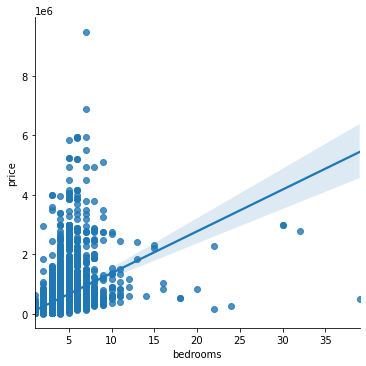

In [53]:
sns.lmplot(x='bedrooms', y='price', data=df9)

In [54]:
df9.isnull().sum()

area         0
price        0
bedrooms     0
land         0
pool         0
brussels     0
flanders     0
wallonia     0
as_new       0
apartment    0
house        0
villa        0
dtype: int64

In [194]:
df10 = df9.copy()
df11 = pd.concat([df10, df3_status], axis=1)
df11.head()

,area,price,bedrooms,land,pool,brussels,flanders,wallonia,as_new,apartment,house,villa,as_new,good,just_renovated,not_specified,to_be_done_up,to_renovate,to_restore
0,123.0,200000.0,2.0,429.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0
3,255.0,698000.0,4.0,1210.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0
4,234.0,499000.0,5.0,744.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0
5,219.0,717000.0,4.0,760.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0
6,156.0,429000.0,4.0,419.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0


In [63]:
# To check the score with the dof 1 between all features and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.drop(['price'], axis=1).values
y = df9.price.values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5626262309232604
(5625, 11)
(5625,)
(1407, 11)
(1407,)
0.6137178196178832


In [67]:
polyreg.predict(X_test).shape

(1407,)

In [69]:
# y_test.reshape(-1, 1)

# # plt.fig = figure(figsize=(10, 8))
# plt.scatter(X_test,y_test)
# plt.scatter(X_test, polyreg.predict(X_test), color='r')
# plt.show()

In [78]:
# To check the score with the dof 2 between all features and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.drop(['price'], axis=1)
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6833299535999545
0.7089766265520483


In [58]:
# To check the score with the dof 3 between all features and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.drop(['price'], axis=1)
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.7233743907292081
0.6406818925725822


In [79]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 11381
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       7032 non-null   float64
 1   price      7032 non-null   int64  
 2   bedrooms   7032 non-null   float64
 3   land       7032 non-null   float64
 4   pool       7032 non-null   int64  
 5   brussels   7032 non-null   uint8  
 6   flanders   7032 non-null   uint8  
 7   wallonia   7032 non-null   uint8  
 8   as_new     7032 non-null   uint8  
 9   apartment  7032 non-null   uint8  
 10  house      7032 non-null   uint8  
 11  villa      7032 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 377.7 KB


In [81]:
# To check the score between area and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.area.values.reshape(-1, 1)
y = df9.price.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4181925732337124
(5625, 1)
(5625, 1)
(1407, 1)
(1407, 1)
0.4925138171475363


In [82]:
# To check the score between area and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.area.values.reshape(-1, 1)
y = df9.price.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.44190953931163546
(5625, 1)
(5625, 1)
(1407, 1)
(1407, 1)
0.46206107100999727


In [84]:
# To check the score between bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.bedrooms.values.reshape(-1, 1)
y = df9.price.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.15792284505350895
(5625, 1)
(5625, 1)
(1407, 1)
(1407, 1)
0.2073672688383702


In [85]:
# To check the score between bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.bedrooms.values.reshape(-1, 1)
y = df9.price.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.19463600769420464
(5625, 1)
(5625, 1)
(1407, 1)
(1407, 1)
0.22263249700310705


In [86]:
# To check the score between bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df9.bedrooms.values.reshape(-1, 1)
y = df9.price.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.1955274907454736
(5625, 1)
(5625, 1)
(1407, 1)
(1407, 1)
0.22015674817229636


In [90]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# subset_area_bedroom = df
X = df9[['area', 'bedrooms']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4184475487782995
(5625, 2)
(5625,)
(1407, 2)
(1407,)
0.4915129727222566


In [91]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# subset_area_bedroom = df
X = df9[['area', 'bedrooms']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4499100668231827
(5625, 2)
(5625,)
(1407, 2)
(1407,)
0.48050738665948944


In [92]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# subset_area_bedroom = df
X = df9[['area', 'bedrooms']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4849614458547986
(5625, 2)
(5625,)
(1407, 2)
(1407,)
0.458096046111949


In [93]:
# To check the score between area, bedrooms, status and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.43626405323009587
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.5112841598216169


In [94]:
# To check the score between area, bedrooms, status and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5074884602571972
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.5733023754761901


In [96]:
# To check the score between area, bedrooms, status and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5296352588445412
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.559862772374191


In [97]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4581389247856922
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.5238442922079602


In [98]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5007695995979311
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.5388187368464705


In [99]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5259632963093985
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.5008083452057395


In [100]:
# To check the score between area, bedrooms, status, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4706284111133109
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5409459072186511


In [101]:
# To check the score between area, bedrooms, status, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.536141043297294
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.6039453434993414


In [102]:
# To check the score between area, bedrooms, status, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5586437939082125
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5947801310204379


In [103]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 11381
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       7032 non-null   float64
 1   price      7032 non-null   int64  
 2   bedrooms   7032 non-null   float64
 3   land       7032 non-null   float64
 4   pool       7032 non-null   int64  
 5   brussels   7032 non-null   uint8  
 6   flanders   7032 non-null   uint8  
 7   wallonia   7032 non-null   uint8  
 8   as_new     7032 non-null   uint8  
 9   apartment  7032 non-null   uint8  
 10  house      7032 non-null   uint8  
 11  villa      7032 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 377.7 KB


In [104]:
# To check the score between area, bedrooms, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.41900153937271356
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.4920907752561151


In [105]:
# To check the score between area, bedrooms, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4606923365337062
(5625, 3)
(5625,)
(1407, 3)
(1407,)
0.47709255474600654


In [106]:
df9.as_new.value_counts()

0    5315
1    1717
Name: as_new, dtype: int64

In [107]:
# To check the score between area, bedrooms, status, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.43653186750315154
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5113337761570678


In [108]:
# To check the score between area, bedrooms, status, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5172904664770757
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5705136594958167


In [109]:
# To check the score between area, bedrooms, status, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5515639246112416
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5723889784480611


In [110]:
# To check the score between area, bedrooms, status, flanders and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5722648068649496
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5608043477925442


In [111]:
# To check the score between area, bedrooms, status, wallonia and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.45438997047729335
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.52391642004959


In [112]:
# To check the score between area, bedrooms, status, wallonia and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5534903427896315
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.614762726761103


In [113]:
# To check the score between area, bedrooms, status, wallonia and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5911084414484018
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.6142617000488226


In [114]:
# To check the score between area, bedrooms, status, brussels and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4938723944050366
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5643291520079989


In [115]:
# To check the score between area, bedrooms, status, brussels and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5799092670499718
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.6477003118466891


In [116]:
# To check the score between area, bedrooms, status, brussels and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5986225866678567
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.6357542222434838


In [117]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 11381
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       7032 non-null   float64
 1   price      7032 non-null   int64  
 2   bedrooms   7032 non-null   float64
 3   land       7032 non-null   float64
 4   pool       7032 non-null   int64  
 5   brussels   7032 non-null   uint8  
 6   flanders   7032 non-null   uint8  
 7   wallonia   7032 non-null   uint8  
 8   as_new     7032 non-null   uint8  
 9   apartment  7032 non-null   uint8  
 10  house      7032 non-null   uint8  
 11  villa      7032 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 377.7 KB


In [118]:
# To check the score between area, bedrooms, status, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4384984514889697
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5133722774090901


In [119]:
# To check the score between area, bedrooms, status, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5130679131118754
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5802502703750836


In [120]:
# To check the score between area, bedrooms, status, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5369776559479402
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5678640559621371


In [121]:
# To check the score between area, bedrooms, status, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4532277385514849
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5144627887252331


In [122]:
# To check the score between area, bedrooms, status, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5186445752666311
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5768855203448302


In [123]:
# To check the score between area, bedrooms, status, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5523934876750961
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5801074302304607


In [124]:
# To check the score between area, bedrooms, status, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5789962731112122
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5410382710627712


In [125]:
# To check the score between area, bedrooms, status, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.46302168136161426
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5186103133904765


In [126]:
# To check the score between area, bedrooms, status, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5333557191913048
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5923701005845297


In [127]:
# To check the score between area, bedrooms, status, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5599106660820898
(5625, 4)
(5625,)
(1407, 4)
(1407,)
0.5897561398942002


In [128]:
df9.villa.value_counts()

0    6005
1    1027
Name: villa, dtype: int64

In [129]:
df9.house.value_counts()

1    5771
0    1261
Name: house, dtype: int64

In [130]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 11381
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       7032 non-null   float64
 1   price      7032 non-null   int64  
 2   bedrooms   7032 non-null   float64
 3   land       7032 non-null   float64
 4   pool       7032 non-null   int64  
 5   brussels   7032 non-null   uint8  
 6   flanders   7032 non-null   uint8  
 7   wallonia   7032 non-null   uint8  
 8   as_new     7032 non-null   uint8  
 9   apartment  7032 non-null   uint8  
 10  house      7032 non-null   uint8  
 11  villa      7032 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 377.7 KB


In [131]:
# To check the score between area, bedrooms, status, brussels, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5224823818853314
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5765419705651235


In [132]:
# To check the score between area, bedrooms, status, brussels, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6085670802538646
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6714299516139377


In [133]:
# To check the score between area, bedrooms, status, brussels, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6318254728718409
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6677276916647268


In [134]:
# To check the score between area, bedrooms, status, brussels, vills, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5482640187869721
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6035971536836604


In [135]:
# To check the score between area, bedrooms, status, brussels, vills, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6313374297095096
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6983843448518764


In [137]:
# To check the score between area, bedrooms, status, brussels, vills, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6696627650973597
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6681081291103634


In [138]:
# To check the score between area, bedrooms, status, brussels, house, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5392016720819885
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.5977881415321386


In [139]:
# To check the score between area, bedrooms, status, brussels, house, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6175240265964796
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6825288438695379


In [141]:
# To check the score between area, bedrooms, status, brussels, house, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6597086684254283
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.656874656490366


In [142]:
# To check the score between area, bedrooms, status, brussels, apartment, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5330447920523638
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6006051222260836


In [143]:
# To check the score between area, bedrooms, status, brussels, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4990924236843687
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5709308552177216


In [144]:
# To check the score between area, bedrooms, status, brussels, apartment, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6173827555510458
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6859829054840343


In [145]:
# To check the score between area, bedrooms, status, brussels, apartment, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6509493573945282
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6639307281642033


In [146]:
# To check the score between area, bedrooms, status, brussels, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5901560478133973
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6616699259939821


In [147]:
# To check the score between area, bedrooms, status, brussels, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6128494029536612
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6546925392127404


In [148]:
# To check the score between area, bedrooms, status, brussels, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5091559630083723
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5679028990386195


In [149]:
# To check the score between area, bedrooms, status, brussels, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5903042629300681
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6549618487269236


In [150]:
# To check the score between area, bedrooms, status, brussels, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'brussels', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.620675066613242
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.653922730761904


In [152]:
# To check the score between area, bedrooms, status, flanders, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4892474465668616
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.5447550513829564


In [153]:
# To check the score between area, bedrooms, status, flanders, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.564699213992997
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6210489868365838


In [154]:
# To check the score between area, bedrooms, status, flanders, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6154552414265024
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6059318188602688


In [155]:
# To check the score between area, bedrooms, status, wallonia, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5126174097564692
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.5601130435098941


In [156]:
# To check the score between area, bedrooms, status, wallonia, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6071028763331059
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6603483032989159


In [157]:
# To check the score between area, bedrooms, status, wallonia, villa, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa', 'pool']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6555748955200458
(5625, 6)
(5625,)
(1407, 6)
(1407,)
0.6225830888897363


In [158]:
# To check the score between area, bedrooms, status, flanders, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.46362445944700237
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.518912374471713


In [159]:
# To check the score between area, bedrooms, status, flanders, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5427788550212738
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5903621684111283


In [160]:
# To check the score between area, bedrooms, status, flanders, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5871919437996389
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5854690885235726


In [161]:
# To check the score between area, bedrooms, status, flanders, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4539641061261016
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5148315625021009


In [162]:
# To check the score between area, bedrooms, status, flanders, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5291960570776022
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5775327736252411


In [163]:
# To check the score between area, bedrooms, status, flanders, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5748061955474404
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5667351466827353


In [164]:
# To check the score between area, bedrooms, status, flanders, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.43866547129483957
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5133340193212798


In [165]:
# To check the score between area, bedrooms, status, flanders, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5233525203029503
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5781577752178264


In [166]:
# To check the score between area, bedrooms, status, flanders, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.559780974206421
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5822500226844931


In [167]:
# To check the score between area, bedrooms, status, flanders, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'flanders', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5802478994400888
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5505172824085407


In [168]:
# To check the score between area, bedrooms, status, wallonia, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4563222279916953
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5256376391217022


In [169]:
# To check the score between area, bedrooms, status, wallonia, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5597276295344723
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6219927143969533


In [170]:
# To check the score between area, bedrooms, status, wallonia, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6003481861736488
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6230947808353524


In [171]:
# To check the score between area, bedrooms, status, wallonia, apartment and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'apartment']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6161002928100379
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5741599711092698


In [172]:
# To check the score between area, bedrooms, status, wallonia, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4739950480690148
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5300876453134776


In [173]:
# To check the score between area, bedrooms, status, wallonia, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5646879938424365
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6220407771144765


In [174]:
# To check the score between area, bedrooms, status, wallonia, house and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'house']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6100750735293295
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6050696064007739


In [175]:
# To check the score between area, bedrooms, status, wallonia, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4840717688359132
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.5348339700475477


In [176]:
# To check the score between area, bedrooms, status, wallonia, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5775243678658359
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6383761239681546


In [177]:
# To check the score between area, bedrooms, status, wallonia, villa and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df9[['area', 'bedrooms', 'as_new', 'wallonia', 'villa']]
y = df9.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.6230307136045415
(5625, 5)
(5625,)
(1407, 5)
(1407,)
0.6231342305540627


In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 11381
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      8004 non-null   float64
 1   price     8004 non-null   int64  
 2   status    8004 non-null   object 
 3   bedrooms  8004 non-null   float64
 4   postcode  8004 non-null   int64  
 5   land      8004 non-null   float64
 6   pool      8004 non-null   int64  
 7   subtype   8004 non-null   object 
 8   region    8004 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 625.3+ KB


In [179]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4102144823530476
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.48081696700110677


In [180]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4625951103879923
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.4965917138510768


In [181]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.47958045551844974
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.5298364907058976


In [182]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4963298667849132
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.5499269162226252


In [183]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5095249078963586
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.5756367298139007


In [184]:
# To check the score between area, bedrooms and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 6
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5007488476428719
(6403, 2)
(6403,)
(1601, 2)
(1601,)
0.5586241039677158


In [185]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.46491413731495723
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.5061542893827191


In [186]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5243438407889344
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.5240227610729506


In [187]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5409156171684523
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.548044310250531


In [188]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5519998801380521
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.5668503670667195


In [189]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.5642459530404504
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.5890525413339918


In [190]:
# To check the score between area, bedrooms, pool and price
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df2[['area', 'bedrooms', 'pool']]
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 6
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

0.4239532701504325
(6403, 3)
(6403,)
(1601, 3)
(1601,)
0.5160829583304056


In [199]:
df11.isnull().sum()

area              972
price             972
bedrooms          972
land              972
pool              972
brussels          972
flanders          972
wallonia          972
as_new            972
apartment         972
house             972
villa             972
as_new              0
good                0
just_renovated      0
not_specified       0
to_be_done_up       0
to_renovate         0
to_restore          0
dtype: int64

In [195]:
# To check the score with the dof 1 between all features and price on df11
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df11.drop(['price'], axis=1)
y = df11.price

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').